# Group Members:

### Munazah (21P-8029)
### Muawiya (21P-8030)
### Abdul Ahad Malik (21P-8036)


In [ ]:
!pip install biopython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 23.3 MB/s eta 0:00:00


# 1. Parsing the YEAST.fasta File


## Extracting sequences and their identifiers (headers) from the FASTA file. Each sequence corresponds to a unique identifier.

In [ ]:
from Bio import SeqIO

# Parse the FASTA file
sequences = {}
for record in SeqIO.parse("YEAST.fasta", "fasta"):
    sequences[record.id] = str(record.seq)

# Display the first few sequences
print(list(sequences.items())[:5])

[('sp|A2P2R3|YM084_YEAST', 'MCGIFGYCNFLIEKTRGEIIDTLIEGLQALEYKEYDSSGISIQGDELESLNIYKQTGKISSLKEEIDLYNLNKNLPFISHCGIAHTRRATHGGLRRANCHPHNSDPSNEFVVVHNGVITNFANLKALLMAKGYVFKSDTDTECIPKLYKHIYDTSIELGYNLDFHVLTNLVLKELEGSYGLLCTSSHFPDEVVAARKGSPLVIGVKGKTDMDVNFVEVEYLDQEEDYLKLNTQTKSSGNVLAAAPVKYNTCLRKSPPFVHNT'), ('sp|A5Z2X5|YP010_YEAST', 'MRPAQLLLNTAKKTSGGYKIPVELTPLFLAVGVALCSGTYFTYKKLRTDETLRLTGNPELSSLDEVLAKDKD'), ('sp|D6VPM8|YAJ3_YEAST', 'MINFLLFVLTILATLTNIWFSGVLSPAMVIRICLGGSMVVLQIWSFSRPISNETFRTKLLLEVITHRPSIAGKEWKTITYNMNQYLFKAGLWKTPYHFFCEHQCYEFFKDLIKGKYPDVQWDTANTQPFISVPENQAATQNSDVEPTVKWCLFKAAEIQAHAVREYWQSQYPDVGIPAI'), ('sp|D6VTK4|STE2_YEAST', 'MSDAAPSLSNLFYDPTYNPGQSTINYTSIYGNGSTITFDELQGLVNSTVTQAIMFGVRCGAAALTLIVMWMTSRSRKTPIFIINQVSLFLIILHSALYFKYLLSNYSSVTYALTGFPQFISRGDVHVYGATNIIQVLLVASIETSLVFQIKVIFTGDNFKRIGLMLTSISFTLGIATVTMYFVSAVKGMIVTYNDVSATQDKYFNASTILLASSINFMSFVLVVKLILAIRSRRFLGLKQFDSFHILLIMSCQSLLVPSIIFILAYSLKPNQGTDVLTTVATLLAVLSLPLSSMWATAANNASKTNTITSDFTTSTDRFYPGTLSSFQTDSINNDAKSSLRSRLYDLYPRRKETTSDKHSERTFVSET

# 2. Loading the Target Classes


## As file AllProteinswithFunctions-Bakers Yeast.txt contains mappings of protein IDs to Gene Ontology (GO) terms. We need to parse this file and create a dictionary where the key is the protein ID, and the value is a list of GO terms.

In [ ]:
# Parse the GO terms file
go_terms = {}
with open("AllProteinswithFunctions-Bakers Yeast.txt") as f:
    for line in f:
        parts = line.strip().split(";")
        protein_id = parts[0]
        go_terms[protein_id] = parts[1:]

# Display the first few entries
print(list(go_terms.items())[:5])


[('P38903', ['GO:0008601']), ('Q00362', ['GO:0008601']), ('P47177', ['GO:0018580']), ('P47096', ['GO:0000334', 'GO:0008198']), ('Q12471', ['GO:0003873', 'GO:0005524'])]


# 3. Match Sequences with GO Terms

## Matching each sequence from the FASTA file with its corresponding GO terms from the target file.

In [ ]:
# Match sequences with their GO terms
data = []
for seq_id, sequence in sequences.items():
    # Extract the accession number (middle part of the sequence ID)
    accession = seq_id.split("|")[1] if "|" in seq_id else seq_id  # Handle cases without "|"

    if accession in go_terms:
        data.append({"id": accession, "sequence": sequence, "go_terms": go_terms[accession]})

# Display the first few entries in the matched data
print(data[:5])


[{'id': 'A2P2R3', 'sequence': 'MCGIFGYCNFLIEKTRGEIIDTLIEGLQALEYKEYDSSGISIQGDELESLNIYKQTGKISSLKEEIDLYNLNKNLPFISHCGIAHTRRATHGGLRRANCHPHNSDPSNEFVVVHNGVITNFANLKALLMAKGYVFKSDTDTECIPKLYKHIYDTSIELGYNLDFHVLTNLVLKELEGSYGLLCTSSHFPDEVVAARKGSPLVIGVKGKTDMDVNFVEVEYLDQEEDYLKLNTQTKSSGNVLAAAPVKYNTCLRKSPPFVHNT', 'go_terms': ['GO:0004360']}, {'id': 'D6VTK4', 'sequence': 'MSDAAPSLSNLFYDPTYNPGQSTINYTSIYGNGSTITFDELQGLVNSTVTQAIMFGVRCGAAALTLIVMWMTSRSRKTPIFIINQVSLFLIILHSALYFKYLLSNYSSVTYALTGFPQFISRGDVHVYGATNIIQVLLVASIETSLVFQIKVIFTGDNFKRIGLMLTSISFTLGIATVTMYFVSAVKGMIVTYNDVSATQDKYFNASTILLASSINFMSFVLVVKLILAIRSRRFLGLKQFDSFHILLIMSCQSLLVPSIIFILAYSLKPNQGTDVLTTVATLLAVLSLPLSSMWATAANNASKTNTITSDFTTSTDRFYPGTLSSFQTDSINNDAKSSLRSRLYDLYPRRKETTSDKHSERTFVSETADDIEKNQFYQLPTPTSSKNTRIGPFADASYKEGEVEPVDMYTPDTAADEEARKFWTEDNNNL', 'go_terms': ['GO:0004934']}, {'id': 'D6W196', 'sequence': 'MLLKNCETDKQRDIRYACLFKELDVKGNGQVTLDNLISAFEKNDHPLKGNDEAIKMLFTAMDVNKDSVVDLSDFKKYASNAESQIWNGFQRIDLDHDGKIGINEINRYLSDLDNQSICNNELNHELSNEKVNKFSRFFEWAFPKRKANIALR

# 4. Prepare Data for Machine Learning
## Convert sequences into numerical features (e.g., using k-mers).
## Convert GO terms into multilabel binary format.

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Convert GO terms into multilabel binary format
mlb = MultiLabelBinarizer()
go_labels = mlb.fit_transform([entry["go_terms"] for entry in data])

# Convert sequences into k-mers (as an example of feature extraction)
def get_kmers(sequence, k=3):
    return [sequence[i:i+k] for i in range(len(sequence) - k + 1)]

features = [get_kmers(entry["sequence"]) for entry in data]

# Display encoded labels and features
print("GO Labels:", go_labels[:5])
print("Features (k-mers):", features[:5])


GO Labels: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Features (k-mers): [['MCG', 'CGI', 'GIF', 'IFG', 'FGY', 'GYC', 'YCN', 'CNF', 'NFL', 'FLI', 'LIE', 'IEK', 'EKT', 'KTR', 'TRG', 'RGE', 'GEI', 'EII', 'IID', 'IDT', 'DTL', 'TLI', 'LIE', 'IEG', 'EGL', 'GLQ', 'LQA', 'QAL', 'ALE', 'LEY', 'EYK', 'YKE', 'KEY', 'EYD', 'YDS', 'DSS', 'SSG', 'SGI', 'GIS', 'ISI', 'SIQ', 'IQG', 'QGD', 'GDE', 'DEL', 'ELE', 'LES', 'ESL', 'SLN', 'LNI', 'NIY', 'IYK', 'YKQ', 'KQT', 'QTG', 'TGK', 'GKI', 'KIS', 'ISS', 'SSL', 'SLK', 'LKE', 'KEE', 'EEI', 'EID', 'IDL', 'DLY', 'LYN', 'YNL', 'NLN', 'LNK', 'NKN', 'KNL', 'NLP', 'LPF', 'PFI', 'FIS', 'ISH', 'SHC', 'HCG', 'CGI', 'GIA', 'IAH', 'AHT', 'HTR', 'TRR', 'RRA', 'RAT', 'ATH', 'THG', 'HGG', 'GGL', 'GLR', 'LRR', 'RRA', 'RAN', 'ANC', 'NCH', 'CHP', 'HPH', 'PHN', 'HNS', 'NSD', 'SDP', 'DPS', 'PSN', 'SNE', 'NEF', 'EFV', 'FVV', 'VVV', 'VVH', 'VHN', 'HNG', 'NGV', 'GVI', 'VIT', 'ITN', 'TNF', 'NFA', 'FAN', 'ANL', 'NLK', 'LKA', 'KAL

# 5. Train a Machine Learning Model


## Split the data into training and testing sets. Use a multilabel classifier Random Forest.

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import hamming_loss, f1_score, jaccard_score

In [ ]:
# Flatten k-mers into strings for vectorization
flattened_features = [" ".join(kmers) for kmers in features]
print('flattened_features', flattened_features)

flattened_features ['MCG CGI GIF IFG FGY GYC YCN CNF NFL FLI LIE IEK EKT KTR TRG RGE GEI EII IID IDT DTL TLI LIE IEG EGL GLQ LQA QAL ALE LEY EYK YKE KEY EYD YDS DSS SSG SGI GIS ISI SIQ IQG QGD GDE DEL ELE LES ESL SLN LNI NIY IYK YKQ KQT QTG TGK GKI KIS ISS SSL SLK LKE KEE EEI EID IDL DLY LYN YNL NLN LNK NKN KNL NLP LPF PFI FIS ISH SHC HCG CGI GIA IAH AHT HTR TRR RRA RAT ATH THG HGG GGL GLR LRR RRA RAN ANC NCH CHP HPH PHN HNS NSD SDP DPS PSN SNE NEF EFV FVV VVV VVH VHN HNG NGV GVI VIT ITN TNF NFA FAN ANL NLK LKA KAL ALL LLM LMA MAK AKG KGY GYV YVF VFK FKS KSD SDT DTD TDT DTE TEC ECI CIP IPK PKL KLY LYK YKH KHI HIY IYD YDT DTS TSI SIE IEL ELG LGY GYN YNL NLD LDF DFH FHV HVL VLT LTN TNL NLV LVL VLK LKE KEL ELE LEG EGS GSY SYG YGL GLL LLC LCT CTS TSS SSH SHF HFP FPD PDE DEV EVV VVA VAA AAR ARK RKG KGS GSP SPL PLV LVI VIG IGV GVK VKG KGK GKT KTD TDM DMD MDV DVN VNF NFV FVE VEV EVE VEY EYL YLD LDQ DQE QEE EED EDY DYL YLK LKL KLN LNT NTQ TQT QTK TKS KSS SSG SGN GNV NVL VLA LAA AAA AAP APV PVK

In [ ]:
# Convert k-mers into numeric vectors using HashingVectorizer
vectorizer = HashingVectorizer(n_features=1000, analyzer="word")
X = vectorizer.fit_transform(flattened_features)
print('X', X)

X   (0, 0)	-0.05954913341754137
  (0, 1)	0.05954913341754137
  (0, 9)	0.05954913341754137
  (0, 11)	-0.05954913341754137
  (0, 13)	-0.05954913341754137
  (0, 14)	-0.05954913341754137
  (0, 16)	0.05954913341754137
  (0, 24)	-0.05954913341754137
  (0, 27)	0.05954913341754137
  (0, 31)	0.0
  (0, 32)	-0.05954913341754137
  (0, 34)	0.05954913341754137
  (0, 51)	-0.05954913341754137
  (0, 65)	-0.05954913341754137
  (0, 71)	-0.11909826683508273
  (0, 98)	0.0
  (0, 109)	-0.05954913341754137
  (0, 110)	-0.05954913341754137
  (0, 118)	0.11909826683508273
  (0, 119)	-0.05954913341754137
  (0, 121)	0.11909826683508273
  (0, 125)	-0.05954913341754137
  (0, 132)	0.05954913341754137
  (0, 140)	0.05954913341754137
  (0, 141)	0.1786474002526241
  :	:
  (4222, 953)	-0.03806934938134405
  (4222, 956)	0.03806934938134405
  (4222, 957)	0.03806934938134405
  (4222, 961)	0.03806934938134405
  (4222, 963)	0.0761386987626881
  (4222, 965)	-0.03806934938134405
  (4222, 967)	0.0
  (4222, 968)	-0.0380693493813440

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, go_labels, test_size=0.2, random_state=42)


In [ ]:
# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test)

print("Hamming Loss:", hamming_loss(y_test, y_pred))
print("F1 Score (Micro):", f1_score(y_test, y_pred, average='micro'))
print("Jaccard Index:", jaccard_score(y_test, y_pred, average='samples'))


Hamming Loss: 0.001192294058299021
F1 Score (Micro): 0.15055852355512384
Jaccard Index: 0.06218934911242603


# 6. Classification Report

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report for each label
label_names = mlb.classes_  # Get the GO term names from the MultiLabelBinarizer
report = classification_report(y_test, y_pred, target_names=label_names, zero_division=0)

print(report)


              precision    recall  f1-score   support

  GO:0000006       0.00      0.00      0.00         0
  GO:0000007       0.00      0.00      0.00         0
  GO:0000009       0.00      0.00      0.00         0
  GO:0000010       0.00      0.00      0.00         0
  GO:0000014       0.00      0.00      0.00         2
  GO:0000026       0.00      0.00      0.00         1
  GO:0000030       0.00      0.00      0.00         4
  GO:0000031       0.00      0.00      0.00         0
  GO:0000033       0.00      0.00      0.00         0
  GO:0000034       0.00      0.00      0.00         0
  GO:0000036       0.00      0.00      0.00         1
  GO:0000048       0.00      0.00      0.00         0
  GO:0000049       0.00      0.00      0.00         7
  GO:0000062       0.00      0.00      0.00         0
  GO:0000064       0.00      0.00      0.00         0
  GO:0000095       0.00      0.00      0.00         0
  GO:0000100       0.00      0.00      0.00         1
  GO:0000102       0.00    

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, precision_score


In [ ]:
# Calculate average precision, recall, and F1-score for training and test data
train_f1 = f1_score(y_train, model.predict(X_train), average='samples')
test_f1 = f1_score(y_test, y_pred, average='samples')

train_precision = precision_score(y_train, model.predict(X_train), average='samples')
test_precision = precision_score(y_test, y_pred, average='samples')

train_recall = recall_score(y_train, model.predict(X_train), average='samples')
test_recall = recall_score(y_test, y_pred, average='samples')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Create data for plotting
metrics = ["F1-Score", "Precision", "Recall"]
train_scores = [train_f1, train_precision, train_recall]
test_scores = [test_f1, test_precision, test_recall]
print('metrics:\n', metrics)
print('train_scores:\n', train_scores)
print('test_scores:\n', test_scores)

metrics:
 ['F1-Score', 'Precision', 'Recall']
train_scores:
 [0.9971531478192224, 0.9978290901914347, 0.996822577462009]
test_scores:
 [0.063379355687048, 0.06485207100591715, 0.0631163708086785]


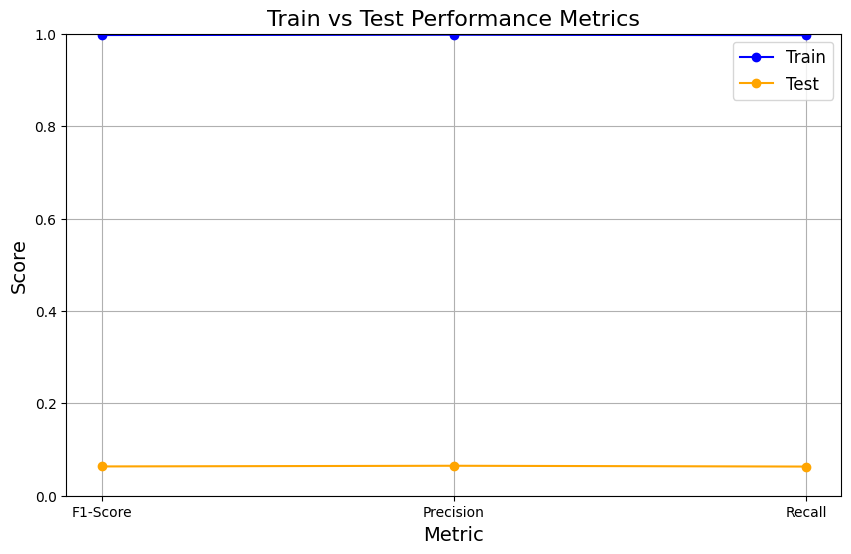

In [ ]:
# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(metrics, train_scores, marker='o', label='Train', color='blue')
plt.plot(metrics, test_scores, marker='o', label='Test', color='orange')
plt.title("Train vs Test Performance Metrics", fontsize=16)
plt.xlabel("Metric", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.ylim(0, 1)
plt.legend(fontsize=12)
plt.grid(True)

Code for Line Plot of Actual vs. Predicted Results

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Count the number of GO terms (labels) present per sample
actual_counts = np.sum(y_test, axis=1)  # Sum of actual labels per sample
predicted_counts = np.sum(y_pred, axis=1)  # Sum of predicted labels per sample
print('actual_counts:\n',actual_counts)
print('predicted_counts:\n', predicted_counts)

actual_counts:
 [ 1  2  1  1  2  1  2  2  1  1  2  2  3  1  1  1 11  3  3  2  2  3  2  2
  3  2  8  1  5  1  2  1  2  1  2  4  1  1  1  2  2  3  3  3  3  3  3  2
  2  8  3  3  2  5  1  1  2  2  2  2  2  1  6  1  1  2  3  1  2  2  1  1
  4  2  3  3  2  4  4  2  1  6  2  1  1  3  2  1  2  1  3  1  1  2  1  1
  1  2  2  2  1  3  4  2  1  2  1  3  3  1  3  3  1  1  2  1  3  4  3  2
  3  1  2  3  3  2  1  3  3  1  2  2  7  1  1  1  4  1  1  1  1  1  3  1
  1  3  2  2  1  3  1  2  1  3  1  2  1  8  1  3  1  3  6  4  3  2  2  3
  4  3  2  2  1  2  1  3  1 10  4  3  2  1  4  4  1  1  3  1  3  4  4  3
  1  1  2  3  2  1  1  2  3  1  1  3  3  2  3  1  1  2  1  5  3  2  4  2
  1  2  3  1  2  2  3  2  7  2  1  1  1  2  3  2  2 10  2  3  1  2  4  2
  2  2  1  1  4  1  3  6  2  1  1  3  1  2  2  1  1  2  1  2  4  1  4  2
 10  3  3  3  2  1  1  3  3  2  2  1  2  2  4  1  1  3  2  1  1  2  2  1
  2  2  4  6  1  1  6  2  2  1  6  3  1  2  2  1  2  1  1  3  1  1  3  1
  2  1  2  5  2  1  2  2  2  1  1  

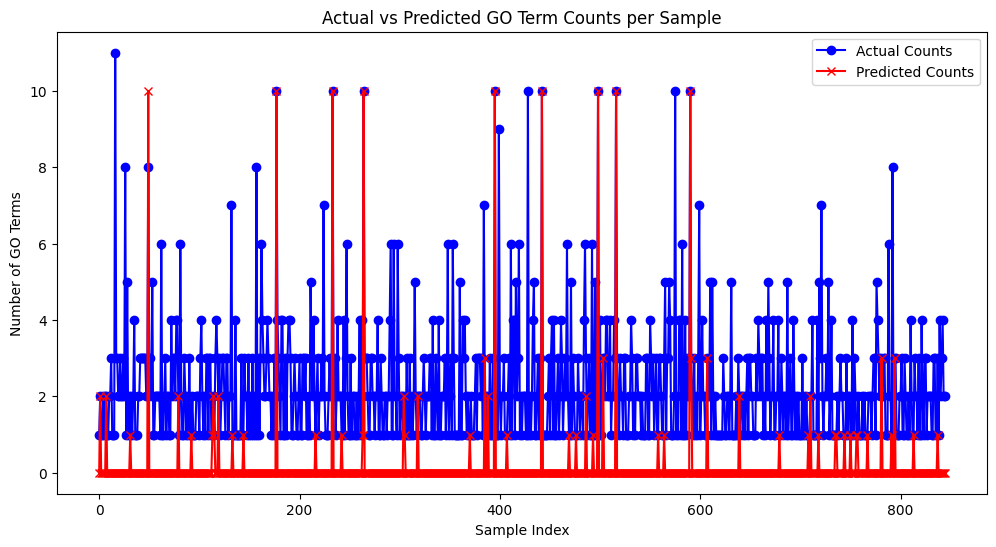

In [ ]:
# Plot the line chart
plt.figure(figsize=(12, 6))

# Line plot for actual counts
plt.plot(actual_counts, label='Actual Counts', color='blue', linestyle='-', marker='o')

# Line plot for predicted counts
plt.plot(predicted_counts, label='Predicted Counts', color='red', linestyle='-', marker='x')

# Adding titles and labels
plt.title('Actual vs Predicted GO Term Counts per Sample')
plt.xlabel('Sample Index')
plt.ylabel('Number of GO Terms')
plt.legend()

# Show the plot
plt.show()

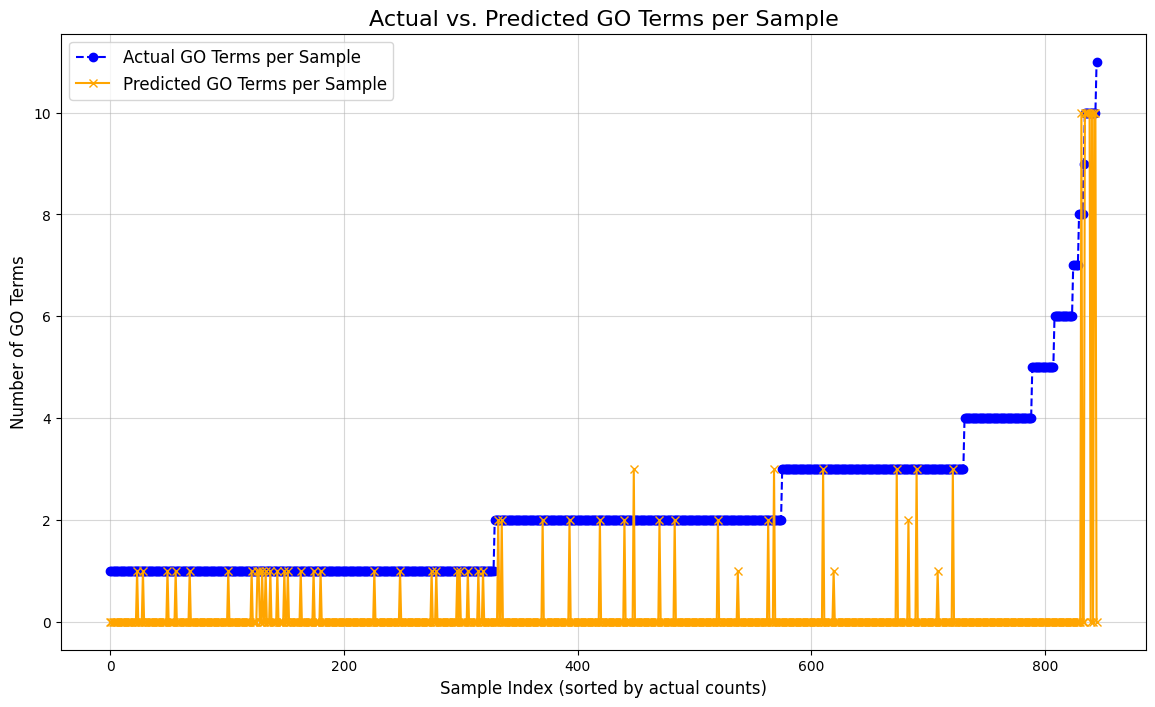

In [ ]:
# Sort samples by actual counts for a cleaner plot
sorted_indices = np.argsort(actual_counts)
actual_counts_sorted = actual_counts[sorted_indices]
predicted_counts_sorted = predicted_counts[sorted_indices]

# Plot the actual vs. predicted results
plt.figure(figsize=(14, 8))
plt.plot(actual_counts_sorted, label="Actual GO Terms per Sample", color="blue", marker="o", linestyle="--")
plt.plot(predicted_counts_sorted, label="Predicted GO Terms per Sample", color="orange", marker="x", linestyle="-")
plt.title("Actual vs. Predicted GO Terms per Sample", fontsize=16)
plt.xlabel("Sample Index (sorted by actual counts)", fontsize=12)
plt.ylabel("Number of GO Terms", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, ConfusionMatrixDisplay


In [ ]:
# Calculate precision, recall, and F1-score for each label
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average=None, zero_division=0)


In [ ]:
# Convert metrics into a DataFrame for visualization
import pandas as pd
metrics_df = pd.DataFrame({
    "GO Term": mlb.classes_,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "Support": support
})

In [ ]:
# Sort by F1-Score for better visualization
metrics_df = metrics_df.sort_values(by="F1-Score", ascending=False)
print('metrics_df\n',metrics_df)

metrics_df
          GO Term  Precision  Recall  F1-Score  Support
865   GO:0008301        1.0    1.00  1.000000        1
148   GO:0001227        1.0    1.00  1.000000        1
324   GO:0004067        1.0    1.00  1.000000        2
250   GO:0003939        1.0    1.00  1.000000        1
521   GO:0004523        1.0    0.75  0.857143       12
...          ...        ...     ...       ...      ...
584   GO:0004639        0.0    0.00  0.000000        0
583   GO:0004638        0.0    0.00  0.000000        0
582   GO:0004637        0.0    0.00  0.000000        0
581   GO:0004636        0.0    0.00  0.000000        0
1735  GO:1990681        0.0    0.00  0.000000        1

[1736 rows x 5 columns]


In [ ]:
# Plot precision, recall, and F1-score for the top 20 GO terms by F1-Score
top_n = 20
top_metrics = metrics_df.head(top_n)
print('top_metrics', top_metrics)

top_metrics          GO Term  Precision    Recall  F1-Score  Support
865   GO:0008301   1.000000  1.000000  1.000000        1
148   GO:0001227   1.000000  1.000000  1.000000        1
324   GO:0004067   1.000000  1.000000  1.000000        2
250   GO:0003939   1.000000  1.000000  1.000000        1
521   GO:0004523   1.000000  0.750000  0.857143       12
263   GO:0003964   1.000000  0.750000  0.857143       12
529   GO:0004540   0.888889  0.727273  0.800000       11
579   GO:0004634   1.000000  0.666667  0.800000        3
392   GO:0004190   1.000000  0.642857  0.782609       14
231   GO:0003887   1.000000  0.642857  0.782609       14
850   GO:0008233   0.888889  0.666667  0.761905       12
726   GO:0005048   1.000000  0.500000  0.666667        2
183   GO:0003735   1.000000  0.468085  0.637681       47
1228  GO:0019843   1.000000  0.333333  0.500000        9
177   GO:0003723   0.954545  0.318182  0.477273       66
1569  GO:0050661   1.000000  0.250000  0.400000        4
162   GO:0003677   

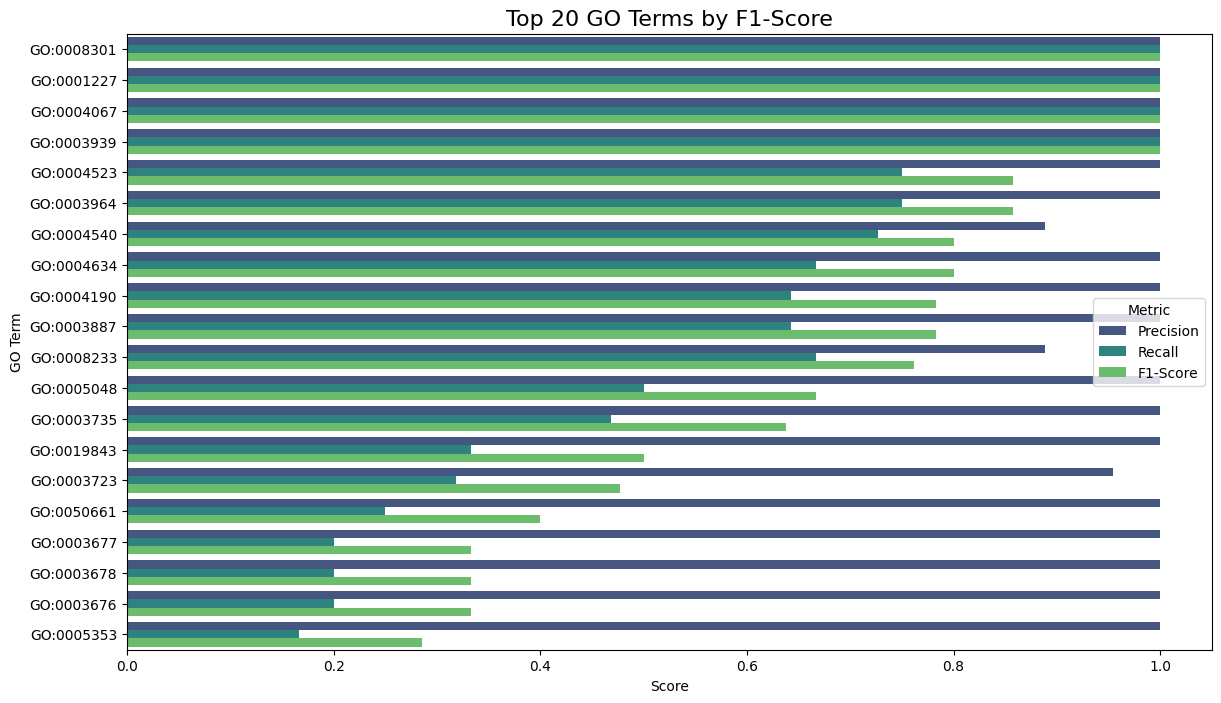

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(data=top_metrics.melt(id_vars="GO Term", value_vars=["Precision", "Recall", "F1-Score"]),
            x="value", y="GO Term", hue="variable", palette="viridis")
plt.title(f"Top {top_n} GO Terms by F1-Score", fontsize=16)
plt.xlabel("Score")
plt.ylabel("GO Term")
plt.legend(title="Metric")
plt.show()


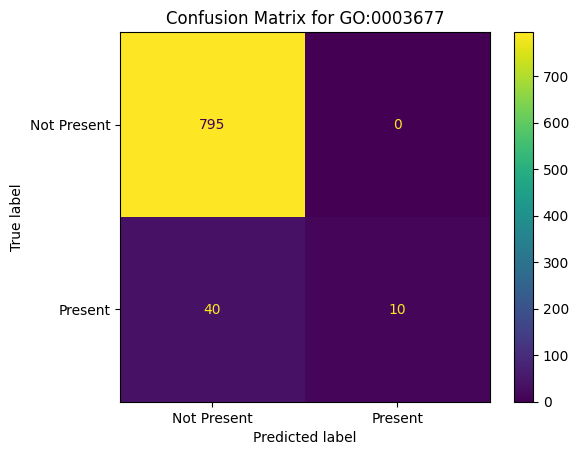

In [ ]:
# Plot confusion matrix for a specific GO term
specific_term = "GO:0003677"  # Replace with the GO term you want to visualize
index = list(mlb.classes_).index(specific_term)

# Extract predictions for the specific label
true_label = y_test[:, index]
pred_label = y_pred[:, index]

ConfusionMatrixDisplay.from_predictions(true_label, pred_label, display_labels=["Not Present", "Present"])
plt.title(f"Confusion Matrix for {specific_term}")
plt.show()

In [1]:
# Import necessary libraries
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import HashingVectorizer

# Function to preprocess new input sequence
def preprocess_sequence(sequence, k=3):
    """
    Convert a sequence into k-mers and vectorize it for prediction.
    """
    def get_kmers(sequence, k):
        return [sequence[i:i + k] for i in range(len(sequence) - k + 1)]

    # Generate k-mers
    kmers = get_kmers(sequence, k)
    # Convert k-mers into numeric format using HashingVectorizer
    vectorizer = HashingVectorizer(n_features=1000, analyzer="word")
    return vectorizer.fit_transform([" ".join(kmers)])  # Flatten k-mers into space-separated strings

# Example new sequence for prediction
new_sequence = "MCGIFGYCNFLIEKTRGEIIDTLIEGLQALEYKEYDSSGISIQGDELESLNIYKQTGKISSLKEEIDLYNLNK"

# Preprocess the new sequence
X_new = preprocess_sequence(new_sequence)

# Predict GO terms
predicted_labels = model.predict(X_new)

# Convert predicted labels back to GO terms
predicted_go_terms = mlb.inverse_transform(predicted_labels)

# Display results
print("Input Sequence:", new_sequence)
print("Predicted GO Terms:", predicted_go_terms)


NameError: name 'model' is not defined